In [63]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import string

In [64]:

# Functions
def get(path):
    data = pd.read_csv(path, encoding='ISO-8859-1')
    return data

def clean(data):
    data = data.dropna(axis=1, how='any')
    return data

def import_file(path):
    corpus = get(path)
    corpus = clean(corpus)
    return corpus


In [65]:
corpus = import_file('resource/spam.csv')

## How many rows/sample?

In [66]:
# Using len()
print(len(corpus))

5572


## What is the longest sample?

In [67]:
# Select corpus
corpus = corpus['v2']

In [68]:
# Find the row with the longest v2 column
longest_simple_length = corpus.str.len().max()
longest_simple_text = corpus.loc[corpus.str.len() == longest_simple_length].iloc[0]
print("Number of longest in term of characters:",longest_simple_length, "\n",longest_simple_text)


Number of longest in term of characters: 910 
 For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later..


## How many word?

In [69]:
word_count = corpus.str.split().apply(len).sum()
print("Number of words in the corpus:", word_count)


Number of words in the corpus: 86335


## What is the average word length?

In [70]:
average_word_length = corpus.str.split().apply(lambda x: [len(word) for word in x]).apply(lambda x: sum(x) / len(x)).mean()

print("Average word length in the corpus:", average_word_length)

Average word length in the corpus: 4.28687076403891


In [71]:
def deep_clean(text):
    # Remove punctuation 
    translator = str.maketrans("", "", string.punctuation)
    # Convert to lowercase ~.~
    cleaned_text = text.translate(translator).lower()
    # Split 
    words = cleaned_text.split()
    return words

corpus = corpus.apply(deep_clean).sum()

word_counts = Counter(corpus)

duplicated_words = {word: count for word, count in word_counts.items() if count > 1}

sorted_duplicated_words = sorted(duplicated_words.items(), key=lambda x: x[1], reverse=True)

for rank, (word, count) in enumerate(sorted_duplicated_words[:10], start=1):
    print(f"Top {rank}:  {word}, {count}")


Top 1:  to, 2240
Top 2:  i, 2230
Top 3:  you, 2124
Top 4:  a, 1428
Top 5:  the, 1322
Top 6:  u, 1119
Top 7:  and, 970
Top 8:  is, 886
Top 9:  in, 884
Top 10:  me, 786


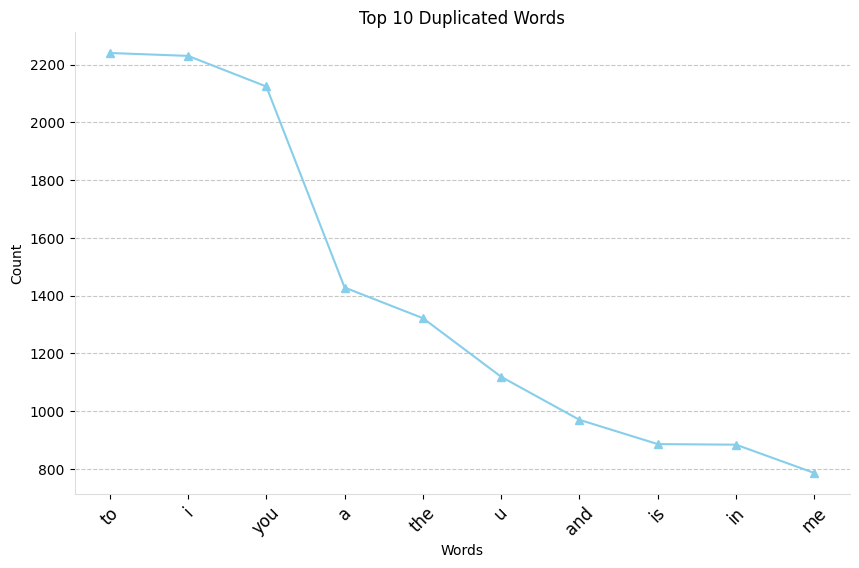

In [72]:
top_words = [word for word, count in sorted_duplicated_words[:10]]
word_counts_top = [count for word, count in sorted_duplicated_words[:10]]


fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(top_words, word_counts_top, color='skyblue', marker='^')
ax.set_title('Top 10 Duplicated Words')
ax.set_xlabel('Words')
ax.set_ylabel('Count')
ax.tick_params(axis='x', rotation=45, labelsize=12)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.spines['left'].set_color('#DDDDDD')
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()
